##### date = 07-july-2021

# Pandas

In [22]:
import pandas as pd

/home/Nithish1201/DataScience/DataScienceEnv/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Collecting data

In [23]:
#extracting data from web
#we get all the tables of that particular webpage in the format of 2D array
data = pd.read_html('http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights')

In [24]:
data[0]

,0
0,"Contents 1 SOCR Data - 25,000 Records of Human..."


In [25]:
data[1]

,Index,Height(Inches),Weight(Pounds)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30
...,...,...,...
195,196,65.80,120.84
196,197,66.11,115.78
197,198,68.24,128.30
198,199,68.02,127.47


In [26]:
df = data[1]

In [27]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30
...,...,...,...
195,196,65.80,120.84
196,197,66.11,115.78
197,198,68.24,128.30
198,199,68.02,127.47


## Cleaning Data

In [28]:
#delete the unwanted columns
del df["Index"]

In [29]:
df

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


In [30]:
df1 = df[['Height(Inches)' ,	'Weight(Pounds)']]
df1

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


## Inspecting Data

In [31]:
#checking for null values (boolean form)
df.isnull().any()

Height(Inches)    False
Weight(Pounds)    False
dtype: bool

In [32]:
#checking for null values (total count)
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [33]:
df.dtypes

Height(Inches)    float64
Weight(Pounds)    float64
dtype: object

In [34]:
df.describe()

,Height(Inches),Weight(Pounds)
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000


## Plot using Pandas

<AxesSubplot:>

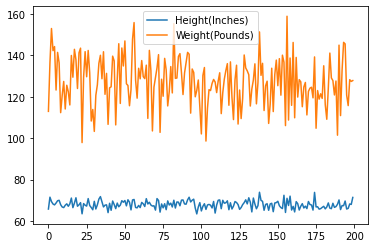

In [35]:
df.plot()

### Scatterplot

<AxesSubplot:xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

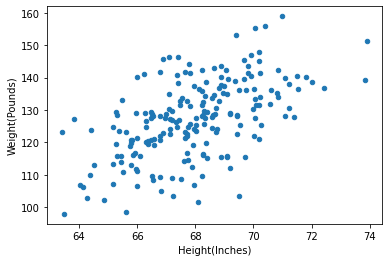

In [36]:
df.plot(x = 'Height(Inches)' , y = 'Weight(Pounds)', kind = 'scatter')

<AxesSubplot:ylabel='Density'>

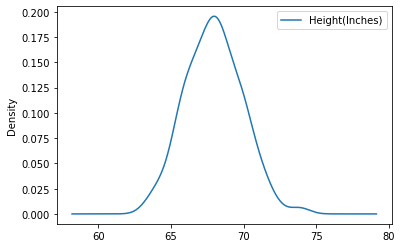

In [42]:
df.plot(y = 'Height(Inches)' , x = 'Weight(Pounds)', kind = 'kde')

## Correlation

In [38]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.556865
Weight(Pounds),0.556865,1.000000


In [12]:
#correlation table with colormap
relation = df.corr()
relation.style.background_gradient(cmap = 'Greens')

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.268107
Weight(Pounds),0.268107,1.000000


#### 12-july-2021

In [115]:
import pandas as pd
import numpy as np

In [116]:
data_source = 'https://bit.ly/3g6AEPj'
df = pd.read_csv(data_source)

In [117]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [118]:
df

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


In [119]:
df .shape

(200, 2)

### Cleaning

#### checking for null values

In [120]:
df.isnull().any()

Height(Inches)    True
Weight(Pounds)    True
dtype: bool

In [121]:
df.isnull().sum()

Height(Inches)    2
Weight(Pounds)    1
dtype: int64

#### Attempting to remove NaN values - (method 1)

In [122]:
df.columns

Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [123]:
def get_nan_indices(dframe):
    nan_places = {}
    for col in dframe.columns:
        indices = list(np.where(dframe[col].isnull())[0])
        #[0] ---> to avoid unnesesory value(dtype)
        nan_places[col] = indices
        
    return nan_places
    

In [124]:
get_nan_indices(df)

{'Height(Inches)': [10, 32], 'Weight(Pounds)': [19]}

In [125]:
df_1 = df.drop(index=[10,19,32],axis=0)

In [126]:
df_1.shape

(197, 2)

#### Attempting to remove NaN values - (method 2)

In [127]:
pdf = df.dropna(axis=0)

In [128]:
pdf.shape

(197, 2)

In [129]:
pdf.head(12)

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
5,68.70,123.30
6,69.80,141.49
7,70.01,136.46
8,67.90,112.37
9,66.78,120.67


#### reset index

In [130]:
rdf = pdf.reset_index(drop = True)

In [131]:
rdf.head(12)

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
5,68.70,123.30
6,69.80,141.49
7,70.01,136.46
8,67.90,112.37
9,66.78,120.67


In [132]:
rdf.shape

(197, 2)

## Filtering

#### Remove values which are above threshold(40)

In [133]:
inch_thresh = 40

In [134]:
rdf[rdf['Height(Inches)']< inch_thresh]

,Height(Inches),Weight(Pounds)
68,30.84,134.02
93,36.29,120.03


In [135]:
rdf = rdf.drop(index=[68,93],axis = 0)

In [136]:
rdf.shape

(195, 2)

In [137]:
hw_df = rdf.reset_index(drop=True)

In [138]:
hw_df.shape

(195, 2)

In [139]:
hw_df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


#### Using pandas cut function to catagorize values

In [140]:
height_cat = pd.cut(x=hw_df['Height(Inches)'],bins = 3,labels = ['short','average','tall'])
weight_cat = pd.cut(x=hw_df['Weight(Pounds)'],bins = 3,labels = ['underwieght','normal','obesity'])

In [141]:
hw_df['height_cat'] = height_cat
hw_df['weight_cat'] = weight_cat

In [142]:
hw_df['height_cat'].value_counts()

average    118
short       60
tall        17
Name: height_cat, dtype: int64

In [143]:
hw_df['weight_cat'].value_counts()

normal         114
underwieght     44
obesity         37
Name: weight_cat, dtype: int64

In [144]:
hdf_pie = hw_df['height_cat'].value_counts().to_frame()
wdf_pie = hw_df['weight_cat'].value_counts().to_frame()

In [145]:
hdf_pie

,height_cat
average,118
short,60
tall,17


In [146]:
wdf_pie

,weight_cat
normal,114
underwieght,44
obesity,37


array([<AxesSubplot:ylabel='height_cat'>], dtype=object)

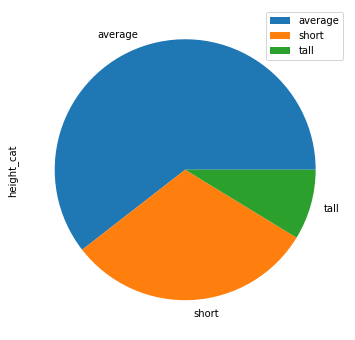

In [147]:
hdf_pie.plot(figsize =(10,6),kind='pie',subplots = True)

array([<AxesSubplot:ylabel='weight_cat'>], dtype=object)

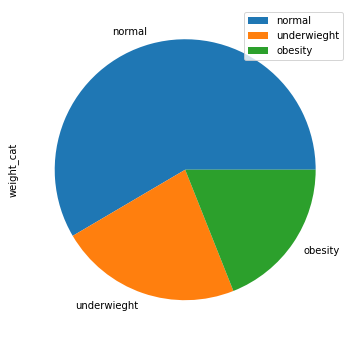

In [150]:
wdf_pie.plot(figsize =(10,6),kind='pie',subplots = True)

#### 14-july-2021

In [151]:
import pandas as pd
#import pandas_profilling as pp
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [192]:
data = pd.read_html('http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights')
df = data[1].drop('Index',axis = 1)
df

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


In [193]:
df.columns

Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [194]:
df.rename(columns = {'Height(Inches)':'Height','Weight(Pounds)': 'Weight'},inplace=True)

In [195]:
df

,Height,Weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


In [33]:
df.mean()

Height     67.94980
Weight    127.22195
dtype: float64

In [34]:
np.mean(df)

Height     67.94980
Weight    127.22195
dtype: float64

In [37]:
df.median()

Height     67.935
Weight    127.875
dtype: float64

In [42]:
np.median(df.Height)

67.935

In [44]:
np.median(df.Weight)

127.875

In [46]:
np.median(df)

85.9

In [47]:
stats.mode(df)

ModeResult(mode=array([[ 65.18, 123.49]]), count=array([[3, 2]]))

In [48]:
np.std(df)

Height     1.935506
Weight    11.931019
dtype: float64

In [49]:
desc = df.describe()
desc

,Height,Weight
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000


In [52]:
desc.loc['median'] = [np.median(df.Height),np.median(df.Weight)]

In [53]:
desc

,Height,Weight
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000
median,67.935000,127.875000
200,67.935000,127.875000


In [54]:
desc.drop(200,axis=0)

,Height,Weight
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000
median,67.935000,127.875000


In [116]:
desc.loc['mode'] = [stats.mode(df.Height)[0][0],stats.mode(df.Weight)[0][0]]

In [56]:
desc

,Height,Weight
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000
median,67.935000,127.875000
200,67.935000,127.875000


In [81]:
height = df.sort_values(by = 'Height')
weight = df.Weight
height

,Height,Weight
97,63.43,123.10
22,63.48,97.90
109,63.84,127.19
39,64.05,106.71
155,64.13,106.11
...,...,...
34,71.80,140.10
158,72.02,138.78
154,72.44,136.74
174,73.83,139.30


No handles with labels found to put in legend.


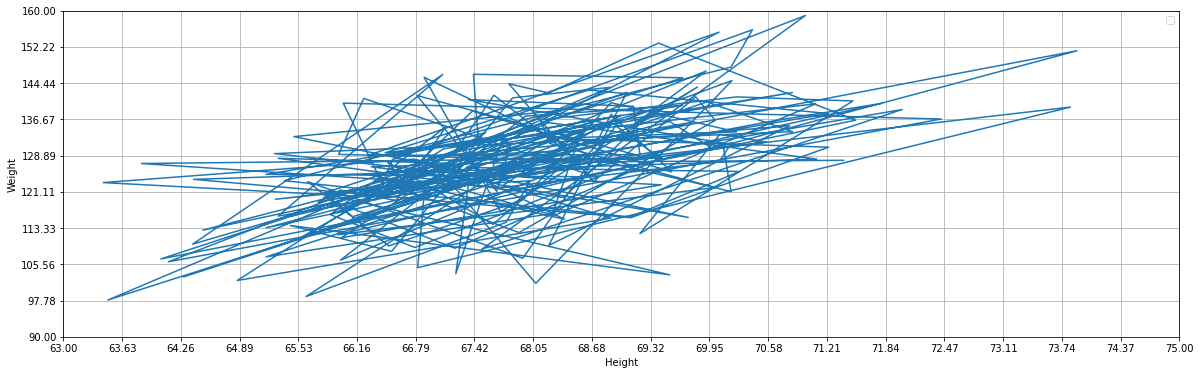

In [110]:
plt.figure(figsize=(20,6))
plt.plot(df.Height,df.Weight)
plt.grid()
plt.xlim(63,75)
plt.xticks(np.linspace(63,75,20,endpoint=True))
plt.ylim(90,160)
plt.yticks(np.linspace(90,160,10,endpoint=True))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

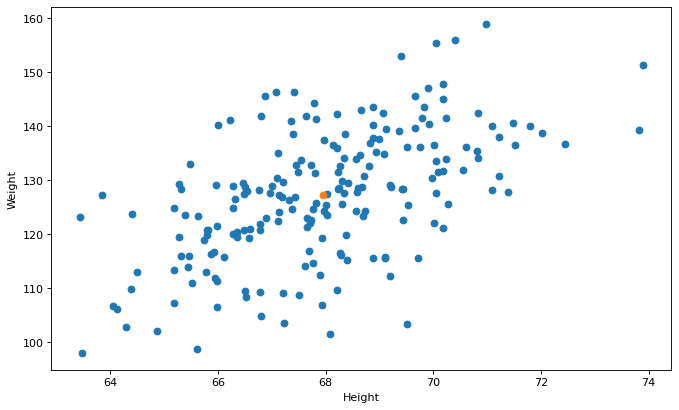

In [95]:
plt.figure(figsize=(10,6),dpi = 80)
plt.scatter(df.Height,df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(np.mean(df.Height),np.mean(df.Weight))
plt.show()

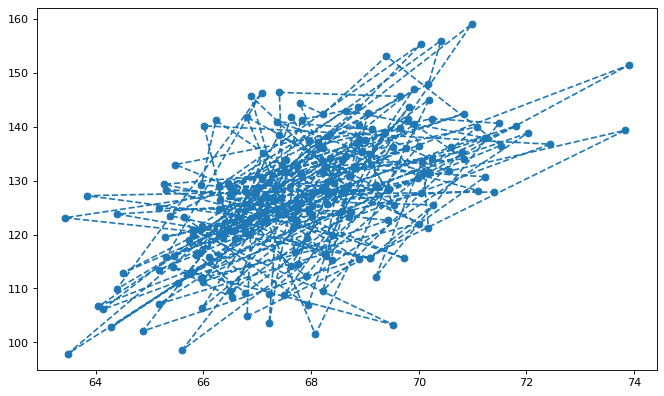

In [159]:
plt.figure(figsize=(10,6),dpi =80)
plt.plot(df.Height,df.Weight,'--o')
plt.show()

### Detecting Outliers

In [160]:
print(np.mean(df.Height),np.mean(df.Weight))

67.9498 127.22194999999999


#### Boxplot method

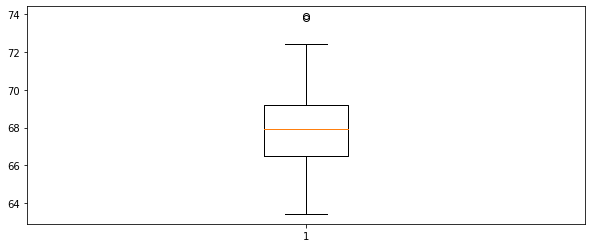

In [141]:
plt.figure(figsize=(10,4))
plt.boxplot(df.Height.tolist())
plt.show()

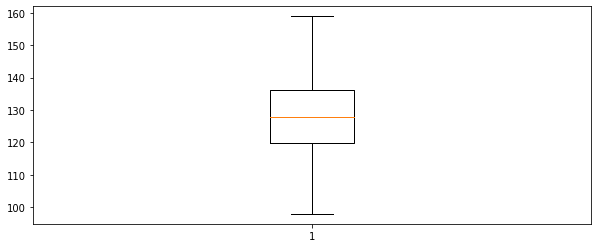

In [161]:
plt.figure(figsize=(10,4))
plt.boxplot(df.Weight.tolist())
plt.show()

In [163]:
sortlist_height = df.sort_values(by = 'Height').Height.tolist()

In [165]:
z_value = []
for i in sortlist_height:
    z_value.append((i - np.mean(df.Height))/np.std(df.Height))
z_value
    

[-2.3352037733569353,
 -2.309370730154174,
 -2.1233728190942793,
 -2.014874037642679,
 -1.9735411685182596,
 -1.8908754302694135,
 -1.839209343863891,
 -1.8340427352233357,
 -1.7823766488178134,
 -1.591212129117367,
 -1.4310472612602372,
 -1.4310472612602372,
 -1.4310472612602372,
 -1.3845477834952697,
 -1.3793811748547147,
 -1.3638813489330563,
 -1.3638813489330563,
 -1.3277150884491922,
 -1.2967154366058757,
 -1.2863822193247727,
 -1.2760490020436623,
 -1.2553825674814563,
 -1.2088830897164817,
 -1.1985498724353787,
 -1.141717177389301,
 -1.1210507428270875,
 -1.1107175255459847,
 -1.1107175255459847,
 -1.1055509169054294,
 -1.074551265062113,
 -1.0487182218593518,
 -1.0332183959376935,
 -1.0280517872971457,
 -1.0177185700160354,
 -1.0177185700160354,
 -1.0125519613754874,
 -1.002218744094377,
 -0.9505526576888547,
 -0.8885533540022218,
 -0.8627203107994607,
 -0.8575537021589055,
 -0.8575537021589055,
 -0.8472204848778024,
 -0.8213874416750412,
 -0.8213874416750412,
 -0.7697213552695

In [196]:
outliers = []
for i in z_value:
    if i < -3.0 or i > 3.0:
        outliers.append(z_value.index(i))
outliers
        

[198, 199]

In [197]:
df.mean()

Height     67.94980
Weight    127.22195
dtype: float64

In [198]:
df.shape

(200, 2)

In [199]:
df = df.drop(outliers,axis = 0)

In [200]:
df.shape

(198, 2)

In [205]:
df.mean()

Height     67.932071
Weight    127.217374
dtype: float64

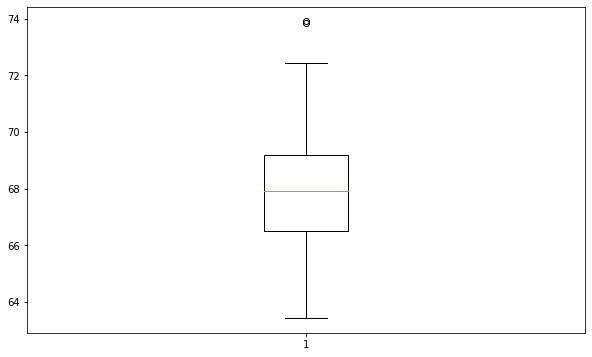

In [207]:
plt.figure(figsize=(10,6))
plt.boxplot(df.Height)
plt.show()

In [208]:
df.shape

(198, 2)

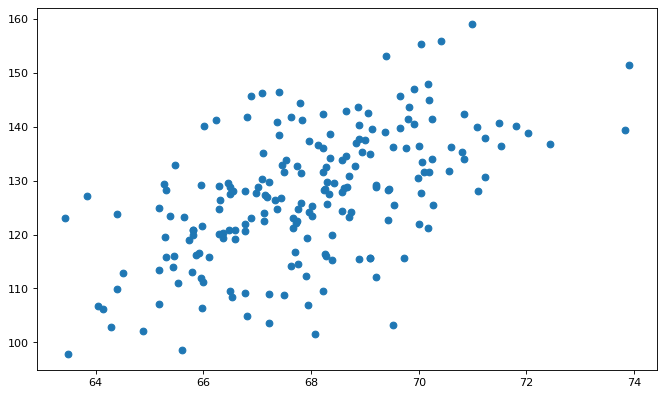

In [209]:
plt.figure(figsize=(10,6),dpi = 80)
plt.scatter(df.Height,df.Weight)
plt.show()